In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('C:\Computer Science\Machine Learning\Projects\Medical Insurance Cost Prediction\insurance.csv')
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [6]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [7]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

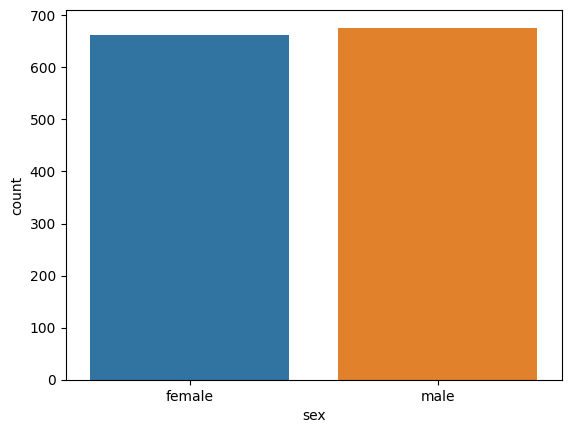

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df['sex']);

C:\Users\KIIT\AppData\Local\Temp\ipykernel_3840\1462740167.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age']);


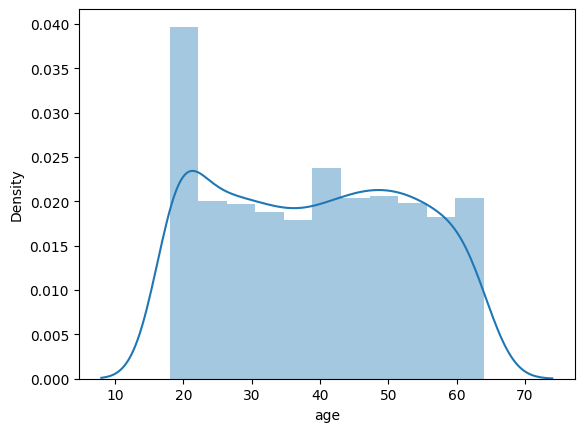

In [9]:
sns.distplot(df['age']);

C:\Users\KIIT\AppData\Local\Temp\ipykernel_3840\1346530715.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi']);


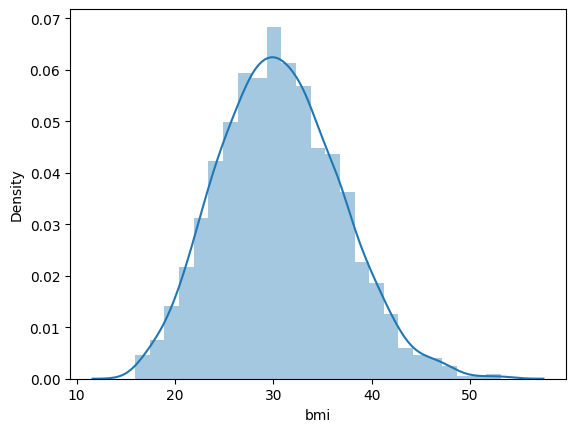

In [10]:
sns.distplot(df['bmi']);

<AxesSubplot: ylabel='smoker'>

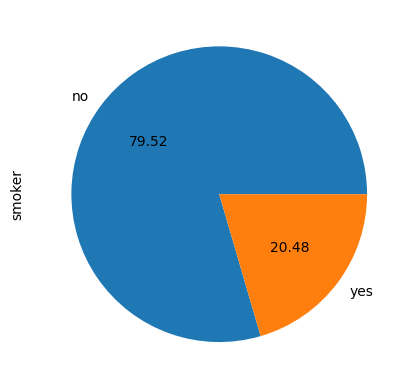

In [11]:
df['smoker'].value_counts().plot(kind = 'pie',autopct = '%.2f')

In [12]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

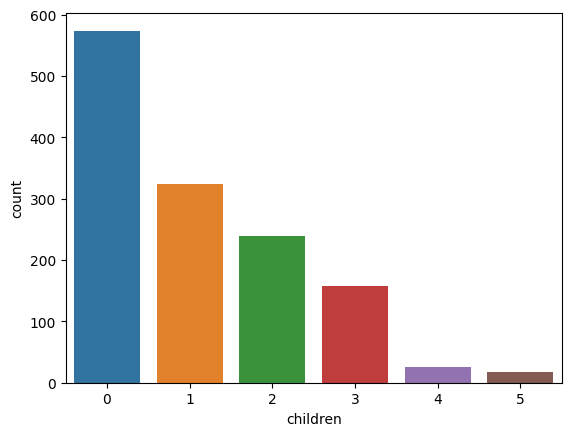

In [13]:
sns.countplot(x = df['children']);

<AxesSubplot: xlabel='region', ylabel='count'>

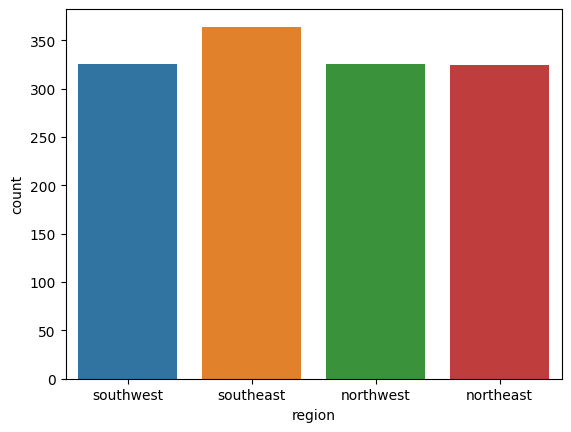

In [14]:
sns.countplot(x = df['region'])

C:\Users\KIIT\AppData\Local\Temp\ipykernel_3840\1319113370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


<AxesSubplot: xlabel='charges', ylabel='Density'>

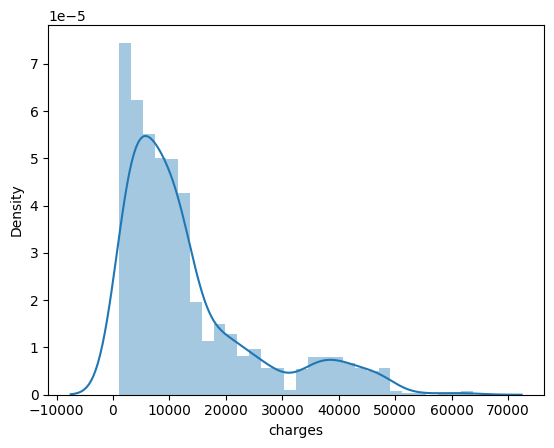

In [15]:
sns.distplot(df['charges'])

Data PreProcessing

In [16]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [17]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['female','male']])
df['sex'] = oe.fit_transform(df[['sex']])

In [18]:
oe = OrdinalEncoder(categories=[['yes','no']])
df['smoker'] = oe.fit_transform(df[['smoker']])

In [19]:
oe = OrdinalEncoder(categories=[['northeast','northwest','southeast','southwest']])
df['region'] = oe.fit_transform(df[['region']])

In [20]:
df

age  sex     bmi  children  smoker  region      charges
0      19  0.0  27.900         0     0.0     3.0  16884.92400
1      18  1.0  33.770         1     1.0     2.0   1725.55230
2      28  1.0  33.000         3     1.0     2.0   4449.46200
3      33  1.0  22.705         0     1.0     1.0  21984.47061
4      32  1.0  28.880         0     1.0     1.0   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50  1.0  30.970         3     1.0     1.0  10600.54830
1334   18  0.0  31.920         0     1.0     0.0   2205.98080
1335   18  0.0  36.850         0     1.0     2.0   1629.83350
1336   21  0.0  25.800         0     1.0     3.0   2007.94500
1337   61  0.0  29.070         0     0.0     1.0  29141.36030

[1338 rows x 7 columns]

In [21]:
df

age  sex     bmi  children  smoker  region      charges
0      19  0.0  27.900         0     0.0     3.0  16884.92400
1      18  1.0  33.770         1     1.0     2.0   1725.55230
2      28  1.0  33.000         3     1.0     2.0   4449.46200
3      33  1.0  22.705         0     1.0     1.0  21984.47061
4      32  1.0  28.880         0     1.0     1.0   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50  1.0  30.970         3     1.0     1.0  10600.54830
1334   18  0.0  31.920         0     1.0     0.0   2205.98080
1335   18  0.0  36.850         0     1.0     2.0   1629.83350
1336   21  0.0  25.800         0     1.0     3.0   2007.94500
1337   61  0.0  29.070         0     0.0     1.0  29141.36030

[1338 rows x 7 columns]

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['charges'] = scaler.fit_transform(df[['charges']])
df['age'] = scaler.fit_transform(df[['age']])
df['bmi'] = scaler.fit_transform(df[['bmi']])

In [61]:
x = df.drop(columns=['charges','region'],axis = 1)
y = df['charges']

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
model = LinearRegression()

In [65]:
model.fit(x_train,y_train)

LinearRegression()

In [66]:
y_pred = model.predict(x_test)

In [67]:
y_pred

array([-9.74625536e-01, -1.49252682e-01, -2.68974688e-01, -8.84199288e-01,
       -4.44958160e-01, -1.65889085e-01, -8.27527017e-01, -1.04461700e+00,
       -1.08302904e-01, -3.29986133e-01, -1.57115137e-01, -6.73522588e-01,
        1.40882601e+00, -1.09543862e+00, -8.57760017e-02,  2.60840412e-02,
       -7.86304615e-01, -4.73850882e-01,  1.36395305e+00, -9.11580579e-01,
       -9.00678734e-02, -8.98840810e-01,  1.75584604e+00,  1.51623997e+00,
        1.42526010e+00, -3.34102160e-01, -9.41640206e-01,  1.79003929e-01,
       -5.52051367e-01, -9.43424317e-01, -2.94234944e-01, -6.45718523e-01,
       -7.16275750e-01, -7.04469248e-01, -2.71839632e-01, -6.98748719e-01,
        1.38309191e+00, -5.25982847e-01,  1.14347914e+00,  8.65304994e-02,
       -1.09158330e+00,  1.25445292e+00, -4.68493827e-01, -9.63171988e-01,
       -2.26933066e-01, -4.28934131e-01, -1.60194530e-01, -4.02460821e-01,
       -1.93666163e-01,  4.67102595e-02, -6.28989570e-01, -1.14095168e+00,
        1.05089658e+00,  

In [68]:
from sklearn import metrics


In [69]:
ans = metrics.r2_score(y_pred,y_test)

In [70]:
ans

0.658277284642045